 # Assignment 18:Forecasting (CocaCola_Sales_Rawdata.xlsx)

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset
coca_s = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

coca_s

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA & Data Preprocessing

In [3]:
coca_s.shape

(42, 2)

In [4]:
coca_s.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
coca_s.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
coca_s.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
#  extract Quarter values and Year values separately from 'Quarter column'
coca_s['Quarters'] = 0
coca_s['Year'] = 0

for i in range(42):
    p = coca_s["Quarter"][i]
    coca_s['Quarters'][i]= p[0:2]
    coca_s['Year'][i]= p[3:5]


In [8]:
coca_s.head(10)

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


 **# Getting dummy variables for Quarters Q1, Q2, Q3, Q4** 

In [9]:
Quarters_Dummies = pd.DataFrame(pd.get_dummies(coca_s['Quarters']))
coca_s = pd.concat([coca_s,Quarters_Dummies],axis = 1)

coca_s.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


# Visualisation

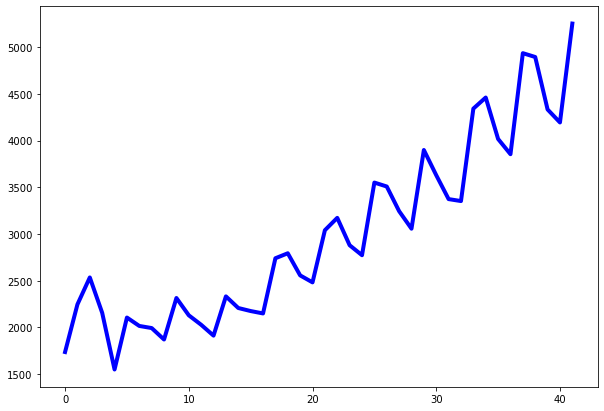

In [26]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(10,7))
plt.plot(coca_s['Sales'], color = 'blue', linewidth=4)

<AxesSubplot:>

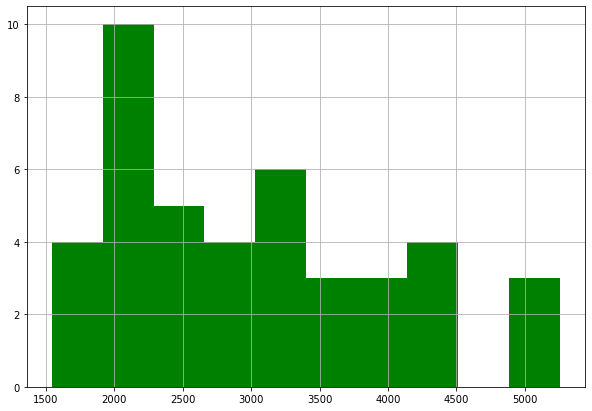

In [29]:
# Histogram
coca_s['Sales'].hist(color = 'green' ,figsize=(10,7))

<AxesSubplot:ylabel='Density'>

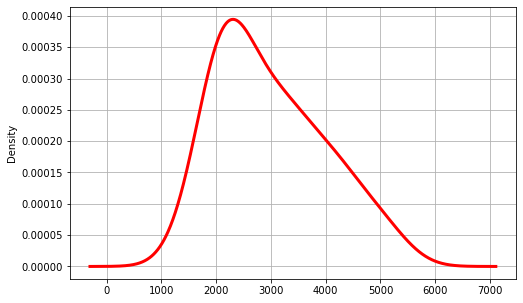

In [30]:
# Density Plot
coca_s['Sales'].plot(kind = 'kde',linewidth=3 ,color = 'red', figsize=(8,5), grid= True)

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

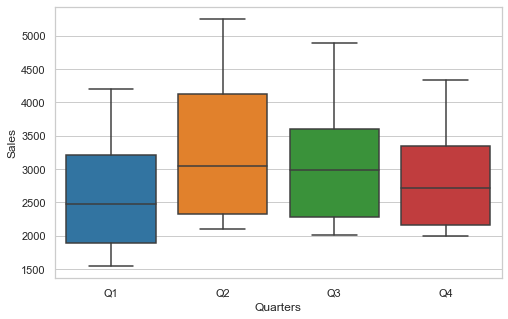

In [33]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)}, style = 'whitegrid',palette="tab10")
sns.boxplot(x="Quarters",y="Sales",data=coca_s)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

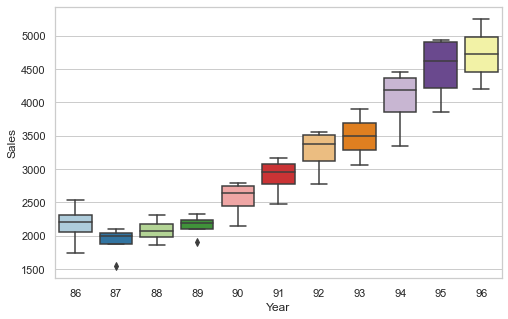

In [49]:
# boxplot of Years Vs. Sales

sns.set(rc={'figure.figsize':(8,5)}, style = 'whitegrid',palette="Paired")
sns.boxplot(x="Year",y="Sales",data=coca_s)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


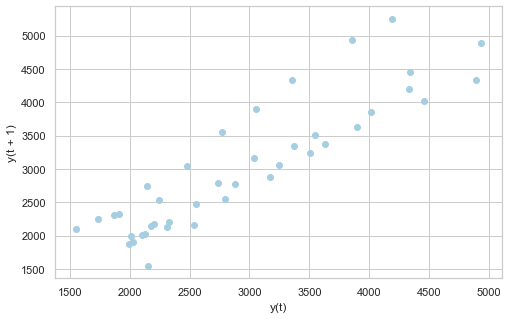

In [50]:
# lagplot for sales
from pandas.plotting import lag_plot

lag_plot(coca_s['Sales'])
plt.show()

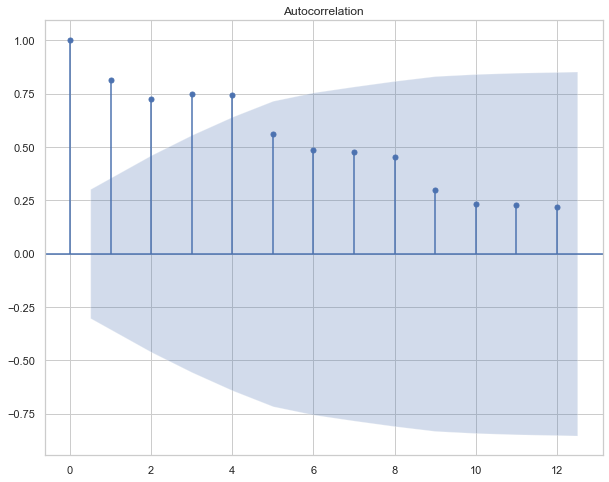

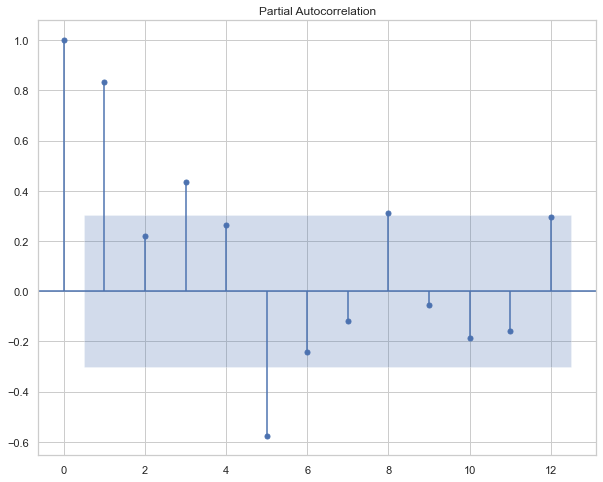

In [52]:
# create an autocorrelation plot

import statsmodels.graphics.tsaplots as tsa_plots
sns.set(rc={'figure.figsize':(10,8)}, style = 'whitegrid')
tsa_plots.plot_acf(coca_s.Sales,lags=12)
tsa_plots.plot_pacf(coca_s.Sales,lags=12)
plt.show()

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

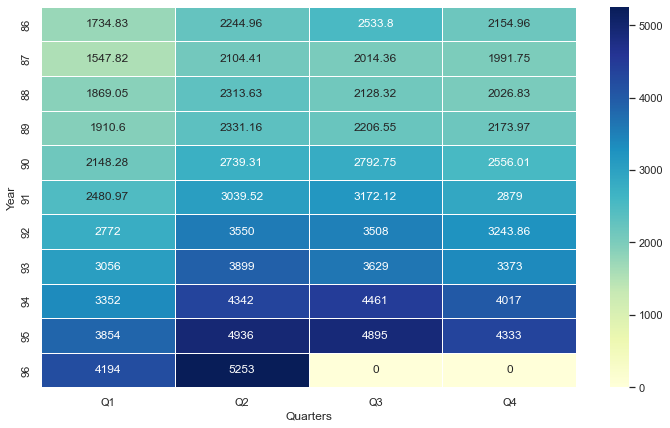

In [57]:
# heatmap

plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=coca_s,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g",cmap="YlGnBu", linewidths=.5)

# Data Driven Forecasting Methods

In [86]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Splitting Data

In [92]:
# Splitting data into Train and Test (77/33)

Train = coca_s.head(32)
Test = coca_s.tail(10)

# Moving Average Method

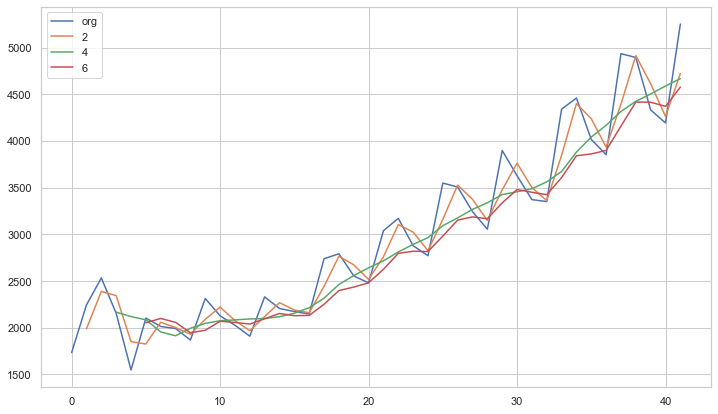

In [83]:
plt.figure(figsize=(12,7))

sns.set(rc={'figure.figsize':(8,5)}, style = 'whitegrid')
coca_s.Sales.plot(label="org")
for i in range(2,8,2):
    coca_s["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

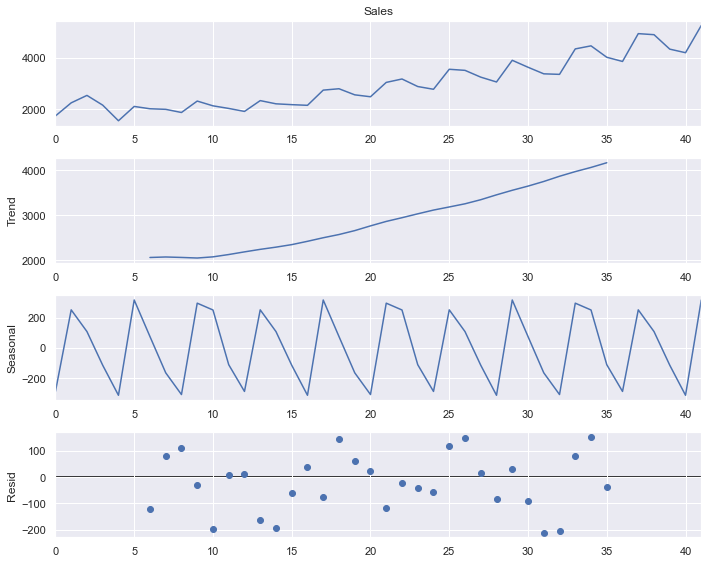

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(10,8)}, style = 'darkgrid')
decompose_ts_add = seasonal_decompose(coca_s.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# Evaluation Metric RMSE

In [94]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Simple Exponential Method

In [95]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1034.935926527898

# Holt method

In [96]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

786.7664832816314

# Holts winter exponential smoothing with additive seasonality and additive trend

In [109]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

478.1154043906915

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [108]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

630.5343070137576

# Model based Forecasting Methods

In [98]:
# Data preprocessing for models
coca_s["t"] = np.arange(1,43)
coca_s["t_squared"] = coca_s["t"]*coca_s["t"]

coca_s["log_sales"] = np.log(coca_s["Sales"])

coca_s.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [99]:
#Splitting data

# Splitting data into Train and Test (77/33)

Train = coca_s.head(32)
Test = coca_s.tail(10)

# Linear Model

In [100]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767115

# Exponential Model

In [101]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076576

# Quadratic Model

In [102]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.73573554072897

# Additive Seasonality model

In [103]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.4665461858353

# Additive Seasonality Quadratic model

In [104]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model   

277.3510771128774

# Multiplicative Seasonality model

In [105]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.250394836116

# Multiplicative Additive Seasonality model

In [106]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.867818269187

In [110]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

In [111]:
dataf = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
dataf

,Model,RMSE_Value
0,Simple Exponential Method,1034.935927
1,Holt method,786.766483
2,HW exp smoothing add,478.115404
3,HW exp smoothing mult,630.534307
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


# Building final model with least RMSE value

In [113]:
coca_s.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [114]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=coca_s).fit()
pred_final = pd.Series(final_model.predict(coca_s[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(coca_s['Sales'], pred_final)
rmse_final_model

159.0552257652247

In [116]:
pred_dataf = pd.DataFrame({'Actual' : coca_s.Sales, 'Predicted' : pred_final})
pred_dataf

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


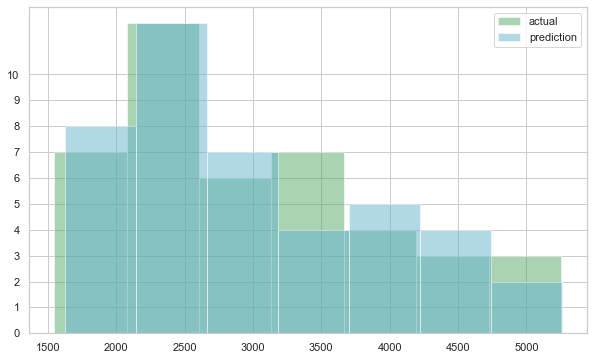

In [135]:
# Actual Vs Predicted graph

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(coca_s.Sales, color = 'g', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()


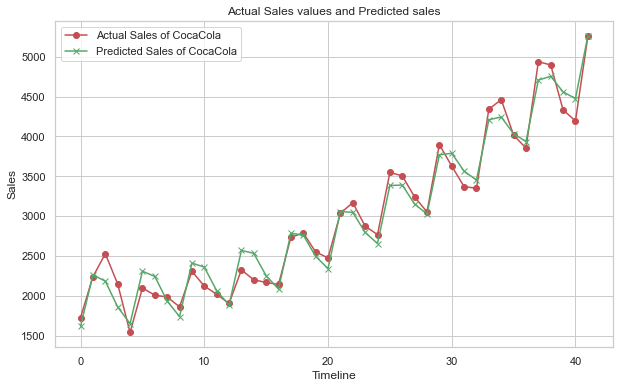

In [137]:
# Plot of Actual Sales values and Predicted sales values
plt.plot(coca_s.Sales, color='r',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='g',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()